In [3]:
# Importation des packages et bibilothèques nécéssaire à la visualisation.

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go






In [8]:
# Chargement des datasets.
datasets = {
    "CO2": pd.read_csv(r"C:\projet\ficher_traiter_spark\CO2_cleaned.csv\CO2.csv"),  
    "THN": pd.read_csv(r"C:\projet\ficher_traiter_spark\THN_cleaned.csv\THN.csv"),  
    "THS": pd.read_csv(r"C:\projet\ficher_traiter_spark\THS_cleaned.csv\THS.csv"),
    "TM": pd.read_csv(r"C:\projet\ficher_traiter_spark\TM_cleaned.csv\TM.csv"), 
}
# Affichage des premières lignes de chaque dataset.
print("Dataset CO2:")
print(datasets["CO2"].head(5))
print("\nDataset THN:")
print(datasets["THN"].head(5))
print("\nDataset THS:")
print(datasets["THS"].head(5))
print("\nDataset TM:")
print(datasets["TM"].head(5))

Dataset CO2:
   Year country       co2  co2_per_capita    population  gdp  cement_co2  \
0  1880   World   853.916           0.603  1.415841e+09  0.0         0.0   
1  1881   World   883.544           0.621  1.423705e+09  0.0         0.0   
2  1882   World   933.360           0.651  1.433553e+09  0.0         0.0   
3  1883   World   992.754           0.687  1.444009e+09  0.0         0.0   
4  1884   World  1004.134           0.690  1.454595e+09  0.0         0.0   

   coal_co2  oil_co2  
0   838.524   15.392  
1   866.278   17.266  
2   914.231   18.964  
3   975.842   16.530  
4   984.619   18.342  

Dataset THN:
   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.36 -0.51 -0.24 -0.30 -0.06 -0.16 -0.18 -0.25 -0.22 -0.31 -0.41   
1  1881 -0.31 -0.22 -0.04  0.00  0.04 -0.34  0.08 -0.05 -0.28 -0.45 -0.37   
2  1882  0.26  0.21  0.02 -0.32 -0.24 -0.30 -0.28 -0.14 -0.23 -0.52 -0.32   
3  1883 -0.57 -0.66 -0.15 -0.29 -0.24 -0.13 -0.04 -0.22 -0.32 -0.16 -0

In [ ]:
# Création de graphique pour visualiser nos données.

Choisissez un dataset (CO2, THN, THS, THS):  THN
Choisissez une variable à visualiser dans THN :  mean_year
Choisissez un type de graphique (Line, Bar ou Box) :  Bar


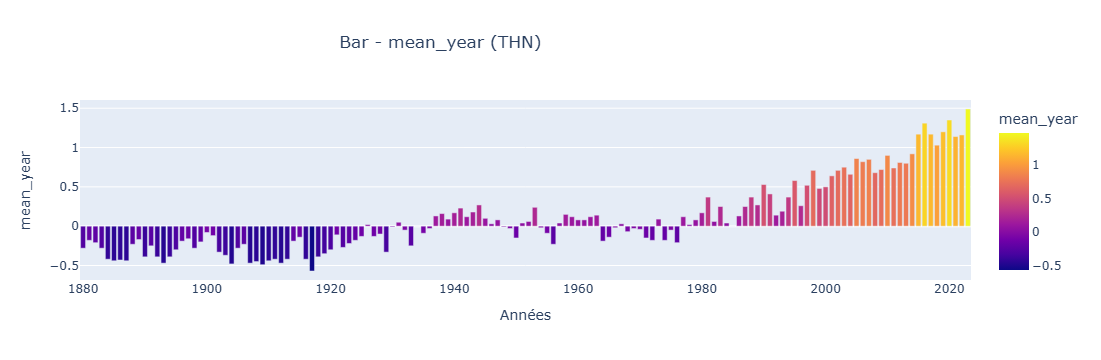

In [11]:
# Fonction pour générer des graphiques interactifs afin de pouvoir augmenter la précision de la visualisation.

def generate_graph(dataset_name, variable, graph_type):
    df = datasets[dataset_name]  
    title = f"{graph_type} - {variable} ({dataset_name})"
    
    if graph_type == "Line":
        fig = px.line(df, x="Year", y=variable, title=title)
        fig.update_layout(xaxis_title='Années', yaxis_title=variable)
        fig.update_traces(line_color='#456987')
        fig.update_layout(title={
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        })
    elif graph_type == "Bar":
        fig = px.bar(df, x="Year", y=variable, color=variable, title=title)
        fig.update_layout(
            barmode="stack",
            xaxis_title="Années",
            yaxis_title=variable
        )
        fig.layout.coloraxis.colorbar.title = variable
        fig.update_layout(title={
            'y': 0.9,
            'x': 0.4,
            'xanchor': 'center',
            'yanchor': 'top'
        })
    elif graph_type == "Box":
        fig = px.box(df, y=variable, title=title)
        fig.update_layout(
            yaxis_title=f"{variable} (°C)" if 'Temp' in dataset_name else variable,
            title={
                'y': 0.9,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'
            }
        )
    else:
        raise ValueError("Invalid graph type. Use 'Line' or 'Bar',or Box.")

    fig.show()

# Interface pour sélectionner les paramètres.
dataset_name = input("Choisissez un dataset (CO2, THN, THS, THS): ")
variable = input(f"Choisissez une variable à visualiser dans {dataset_name} : ")
graph_type = input("Choisissez un type de graphique (Line, Bar ou Box) : ")

# Génération du graphique.
generate_graph(dataset_name, variable, graph_type)

In [ ]:
#Compte tenu de certains résultats obtenus lors de la visualisation (présence d'outliers), une analyse et un traitement plus approfondis sont nécessaires 
#pour approfondir l'analyse de nos données tout en évitant les biais."